In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})

In [16]:
members.columns

Index(['uri', 'name', 'sort_name', 'title', 'gender', 'is_organization',
       'has_card', 'birth_year', 'death_year', 'membership_years', 'viaf_url',
       'wikipedia_url', 'nationalities', 'addresses', 'postal_codes',
       'arrondissements', 'coordinates', 'notes', 'updated'],
      dtype='object')

In [17]:
members.shape

(5235, 19)

In [18]:
members.sample(5)

,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
2561,https://shakespeareandco.princeton.edu/members...,Johnstone,Johnstone,NaN,NaN,False,False,NaN,NaN,1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30T18:09:30+00:00
1505,https://shakespeareandco.princeton.edu/members...,Jean Duren,"Duren, Jean",Mme,Female,False,True,NaN,NaN,1921;1922;1938,NaN,NaN,NaN,"72 boulevard du Montparnasse, Paris;114 rue de...",75014;75007,14;7,"48.84327, 2.32494;48.85294, 2.32359",NaN,2020-05-02T17:13:43+00:00
4984,https://shakespeareandco.princeton.edu/members...,Sarah Pressly Watson / Miss S. P. Watson,"Watson, Sarah Pressly",Miss,Female,False,True,1885.0,1959.0,1925;1958;1932;1933;1941;1942;1943;1945,http://viaf.org/viaf/65579722,NaN,United States,"Foyer international des étudiantes, 93 bouleva...",75005,5,"48.84465, 2.33993",NaN,2019-12-29T18:24:41+00:00
3993,https://shakespeareandco.princeton.edu/members...,Mr. Raymond,"Raymond, Mr.",Mr.,Male,False,False,NaN,NaN,1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31T05:04:10+00:00
1325,https://shakespeareandco.princeton.edu/members...,de Rochemont,de Rochemont,NaN,NaN,False,False,NaN,NaN,1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-23T00:28:45+00:00


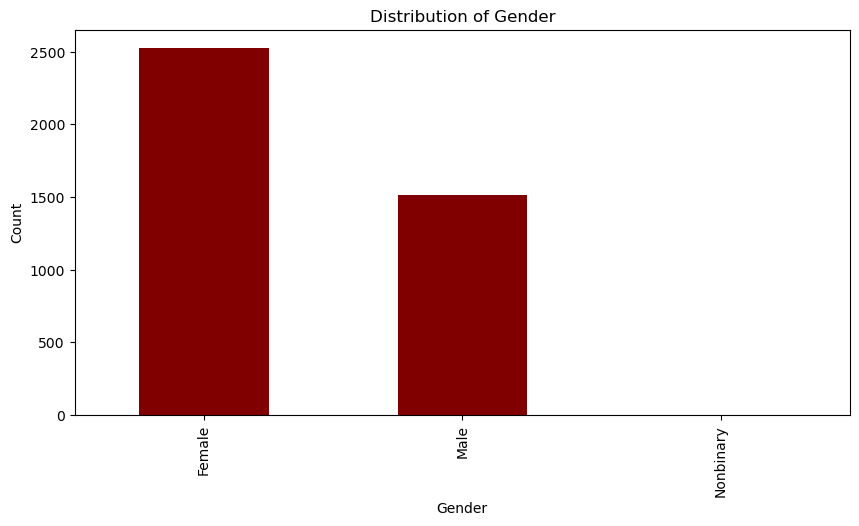

Mode of gender distribution: Female


In [19]:
mode_gender = members['gender'].value_counts().idxmax() # mode

# SINCE VALUE_COUNTS DOES NOT COUNT NAN; HOW MANY ARE UNDEFINED????

count_gender = members['gender'].value_counts().sort_index()  # operate on series ; count

fig, ax = plt.subplots(figsize=(10, 5))

count_gender.plot(kind='bar', color='maroon', ax=ax)

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender')

plt.show()

print(f"Mode of gender distribution: {mode_gender}")

In [20]:
count_gender.index.tolist()

['Female', 'Male', 'Nonbinary']

In [21]:
from scipy.stats import entropy

gender_counts = members['gender'].value_counts(normalize=True)
entropy_gender = entropy(gender_counts)

print(f"Entropy of gender distribution: {entropy_gender}")

Entropy of gender distribution: 0.6636712663698797


In [22]:
gender_counts

Female       0.624907
Male         0.374845
Nonbinary    0.000248
Name: gender, dtype: float64

In [13]:
undefined_gender_count = members['gender'].isna().sum()
print(f"Number of undefined gender values: {undefined_gender_count}")

Number of undefined gender values: 1196


In [23]:
total_defined_gender_count = len(members['gender']) - undefined_gender_count
print(f"Number of defined gender values: {total_defined_gender_count}")

Number of defined gender values: 4039


In [26]:
print(f"Number of total gender values: {len(members['gender'])}")

Number of total gender values: 5235
